#  🔍 Parser Comparison

In [1]:
import json

# Load the data
with open('repo_to_prompts.json', 'r') as f:
    repo_to_prompts = json.load(f)

# Load log classifier prompt data
with open('repo_to_prompts_logClassifier.json', 'r') as f:
    log_classifier_prompts = json.load(f)

# Load flair classifier prompt data
with open('repo_to_prompts_FLAIR.json', 'r') as f:
    flair_classifier_prompts = json.load(f)

### 📊 Unique Prompts in each dataset

In [2]:
# Prompt Benchmark (Default) -- Prompts grabbed using Ishan's Heuristic
all_prompts = []
for repo, prompts in repo_to_prompts.items():
    all_prompts.extend(prompts)
all_prompt_set = set(all_prompts)
print(f"Default ; Total number of prompts: {len(all_prompts)}, unique prompts: {len(all_prompt_set)}")

# Flair Prompts
all_flair_prompts = []
for repo, prompts in flair_classifier_prompts.items():
    all_flair_prompts.extend(prompts)
all_flair_prompts_set = set(all_flair_prompts)
print(f"Flair ; Total number of prompts: {len(all_flair_prompts)}, unique prompts: {len(all_flair_prompts_set)}")

# Log Prompts
all_log_prompts = []
for repo, prompts in log_classifier_prompts.items():
    all_log_prompts.extend(prompts)
all_log_prompts_set = set(all_log_prompts)
print(f"Log ; Total number of prompts: {len(all_log_prompts)}, unique prompts: {len(all_log_prompts_set)}")

Default ; Total number of prompts: 1127, unique prompts: 896
Flair ; Total number of prompts: 2276, unique prompts: 1822
Log ; Total number of prompts: 6656, unique prompts: 3996


#### 🧩 Set Differences and Intersections

In [3]:
# Looking at the intersection of the sets
print("# Looking at the intersection of the sets")
print(f"Default AND FLAIR: {len(all_prompt_set.intersection(all_flair_prompts_set))}")
print(f"Default AND LOG: {len(all_prompt_set.intersection(all_log_prompts_set))}")
print(f"Flair AND LOG: {len(all_flair_prompts_set.intersection(all_log_prompts_set))}")
print(f"Default AND FLAIR AND LOG: {len(all_prompt_set.intersection(all_flair_prompts_set, all_log_prompts_set))}")
print("")

# Looking at the difference of the sets
print("# Looking at the difference of the sets")
print(f"Default - FLAIR: {len(all_prompt_set.difference(all_flair_prompts_set))}")
print(f"Default - LOG: {len(all_prompt_set.difference(all_log_prompts_set))}")
print(f"FLAIR - LOG: {len(all_flair_prompts_set.difference(all_log_prompts_set))}")
print(f"Default - FLAIR - LOG: {len(all_prompt_set.difference(all_flair_prompts_set, all_log_prompts_set))}")

# Looking at the intersection of the sets
Default AND FLAIR: 890
Default AND LOG: 768
Flair AND LOG: 1319
Default AND FLAIR AND LOG: 765

# Looking at the difference of the sets
Default - FLAIR: 6
Default - LOG: 128
FLAIR - LOG: 503
Default - FLAIR - LOG: 3


In [4]:
# Prompts in Default but not in Flair set
all_prompt_set.difference(all_flair_prompts_set)

{'"""\n                            # 🤖 Chat2Anything\n                            """',
 '"""\nsetup.cfg\n```cfg\n[develop]\nscript_dir=$base/lib/{package_name}\n[install]\ninstall_scripts=$base/lib/{package_name}\n```\n"""',
 '"""Answer the following questions as best you can, but speaking as a pirate might speak. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n(this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin! Remember to speak as a pirate when giving your final answer. Use lots of "Arg"s\n\nQuestion: {input}\n{agent_scratchpad}"""',
 '"""\\\n```python\n# Load the dataset:\ndataset = FeedbackDa

# 🔍 **Analyzing Results**

Prompt Count vs. Repo Count

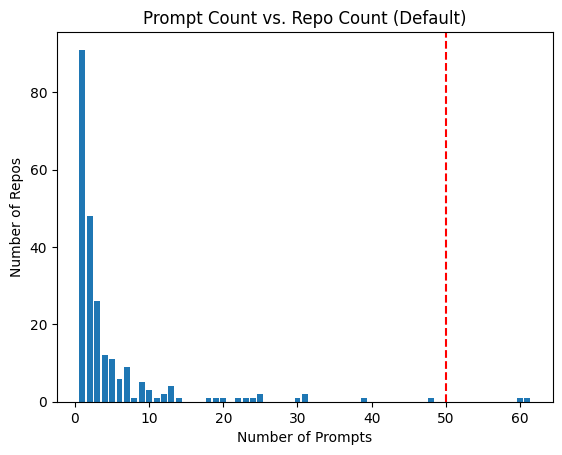

Number of repos with more than 10 prompts: 2


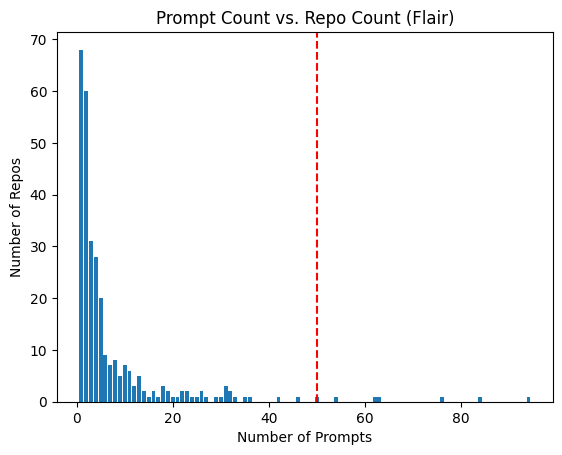

Number of repos with more than 10 prompts: 6


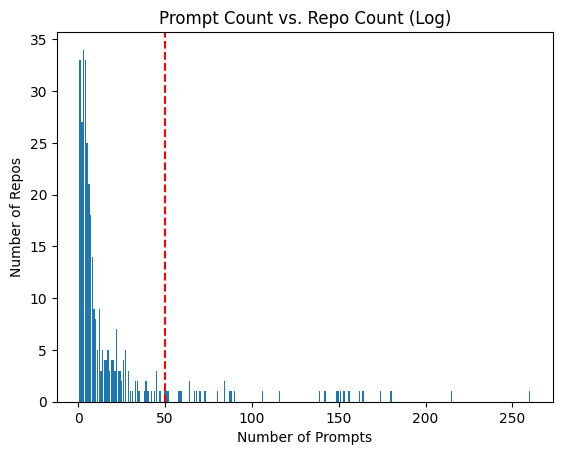

Number of repos with more than 10 prompts: 31


In [16]:
# Plot the distribution of prompt lengths
import matplotlib.pyplot as plt

def plot(repo_to_prompts, threshold=50, title="Prompt Count vs. Repo Count"):
    repo_to_promptCount = {}
    for repo in repo_to_prompts:
        repo_to_promptCount[repo] = len(repo_to_prompts[repo])

    # Prompt Count to Repo Count
    promptCount_to_repoCount = {}
    for repo in repo_to_promptCount:
        promptCount = repo_to_promptCount[repo]
        promptCount_to_repoCount[promptCount] = promptCount_to_repoCount.get(promptCount, 0) + 1

    # Plot the distribution of prompt lengths
    # plt.figure(figsize=(20,10))
    plt.bar(promptCount_to_repoCount.keys(), promptCount_to_repoCount.values())
    plt.xlabel("Number of Prompts")
    plt.ylabel("Number of Repos")

    # Draw a line at the threshold
    plt.axvline(x=threshold, color='r', linestyle='--')

    plt.title(title)
    plt.show()

    count = 0
    for repo in repo_to_promptCount:
        if repo_to_promptCount[repo] > threshold:
            # print(repo, repo_to_promptCount[repo])
            count += 1
    print(f"Number of repos with more than 10 prompts: {count}")

plot(repo_to_prompts, title="Prompt Count vs. Repo Count (Default)")
plot(flair_classifier_prompts, title="Prompt Count vs. Repo Count (Flair)")
plot(log_classifier_prompts, title="Prompt Count vs. Repo Count (Log)")